# 1. Libraries Import:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

# 2. DF Examine 

In [64]:
sales = pd.read_csv("sales.csv")

In [65]:
sales.head(5)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


`Don't know what the Unnamed column is so lets check it and drop it if so`

In [66]:
sales["Unnamed: 0"].value_counts()


Unnamed: 0
425390    1
470563    1
581093    1
449511    1
671617    1
         ..
359805    1
159087    1
52456     1
46534     1
305711    1
Name: count, Length: 640840, dtype: int64

`Looks random so drop it`

In [67]:
sales = sales.drop(columns=["Unnamed: 0"])

In [68]:
sales.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [69]:
sales.isnull().sum()

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

### 2.1 DATE Column Review

`to_datetime transformation:`

In [70]:
sales["date"] = pd.to_datetime(sales["date"])

In [71]:
sales["day_of_week"] = sales["date"].dt.dayofweek
sales["week_of_year"] = sales["date"].dt.isocalendar().week
sales["month"] = sales["date"].dt.month
sales["year"] = sales["date"].dt.year

#week_of_year is a UInt32 type.
sales["week_of_year"] = sales["week_of_year"].astype("int32")

sales.head(5)

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,week_of_year,month,year
0,366,3,2013-04-18,517,1,0,0,0,4422,16,4,2013
1,394,5,2015-04-11,694,1,0,0,0,8297,15,4,2015
2,807,3,2013-08-29,970,1,1,0,0,9729,35,8,2013
3,802,1,2013-05-28,473,1,1,0,0,6513,22,5,2013
4,726,3,2013-10-10,1068,1,1,0,0,10882,41,10,2013


`Initial column date is no longer needed `

In [72]:
sales = sales.drop(columns=["date"])

In [73]:
sales.dtypes

store_ID                int64
day_of_week             int32
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
week_of_year            int32
month                   int32
year                    int32
dtype: object

### 2.2 state_holiday Column Review

`Check on the state_holiday column`

In [74]:
sales.state_holiday.value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

`We can transform in holidays vs no holiday (0 and 1)`

In [75]:
sales["state_holiday"] = sales["state_holiday"].replace(["a", "b", "c"], 1)

In [76]:
sales.state_holiday.value_counts()

state_holiday
0    621160
1     19680
Name: count, dtype: int64

In [77]:
sales.head(5)

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,week_of_year,month,year
0,366,3,517,1,0,0,0,4422,16,4,2013
1,394,5,694,1,0,0,0,8297,15,4,2015
2,807,3,970,1,1,0,0,9729,35,8,2013
3,802,1,473,1,1,0,0,6513,22,5,2013
4,726,3,1068,1,1,0,0,10882,41,10,2013


# 3. Column Corr

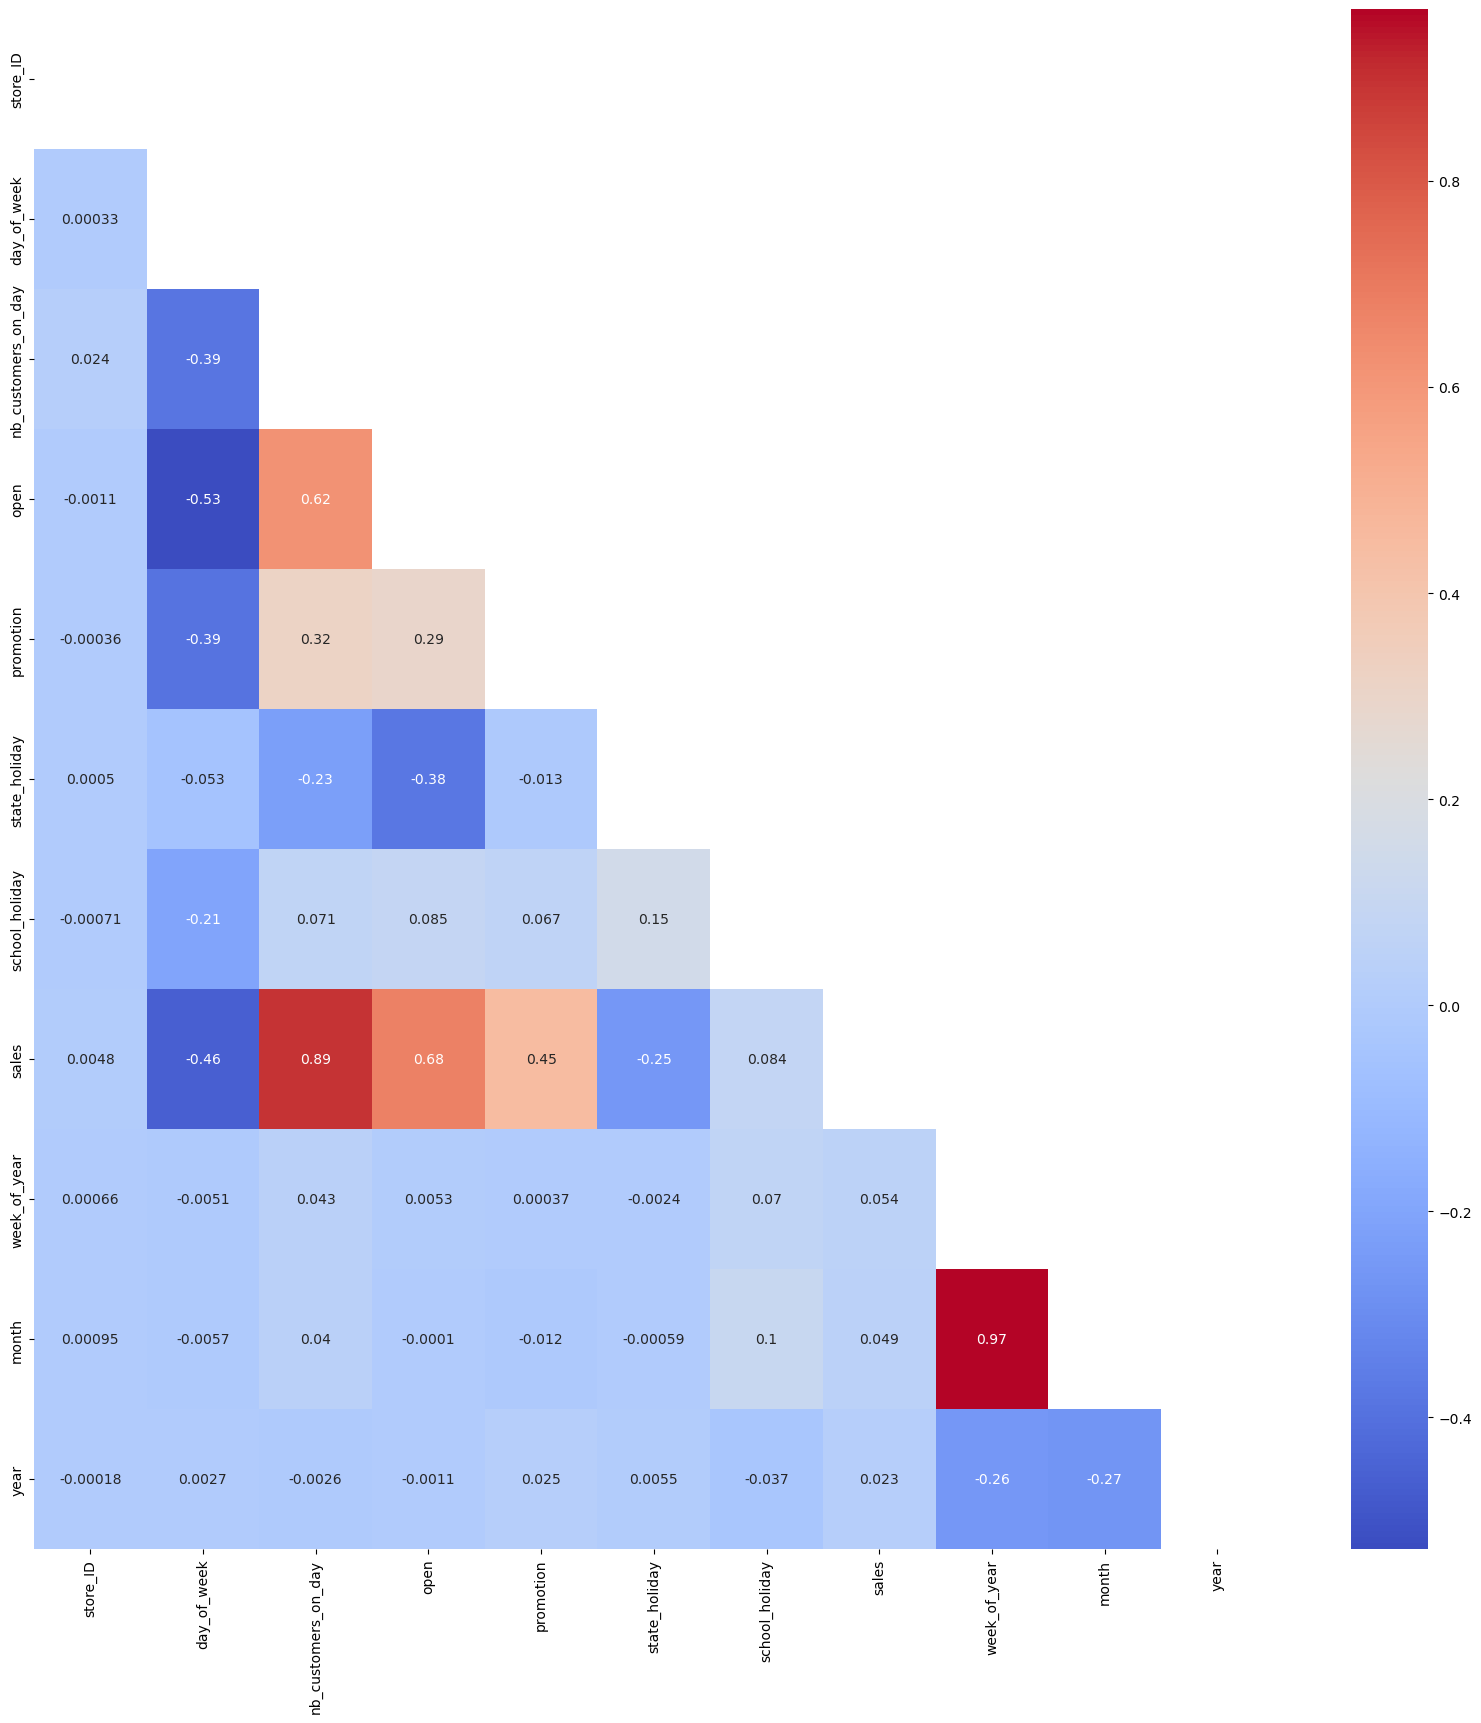

In [78]:
mask = np.triu(np.ones_like(sales.corr(), dtype=bool))

fig = plt.figure(figsize=(20, 20))
sns.heatmap(sales.corr(), annot=True, cmap="coolwarm", mask=mask)  
plt.show()

`We can drop week_of_year `

In [79]:
sales = sales.drop(columns=["week_of_year"])

# 4. Model Creation

In [80]:
X_train, X_test, y_train, y_test = train_test_split(sales.drop(columns=["sales"]), 
                                                    sales["sales"],test_size=0.2, 
                                                    random_state=0)

### 4.1 LinearRegression:

In [81]:
regr = LinearRegression()

In [82]:
sales_model_1 = regr.fit(X_train, y_train)

sales_model_1.score(X_test, y_test)

0.8544279759246547

In [83]:
model_1_pred = sales_model_1.predict(X_test)

In [84]:
np.array(y_test)

array([4025, 5538, 5579, ..., 7505,    0, 6238])

In [85]:
r2 = r2_score(y_test, model_1_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.8544279759246547


`The model performs well but wee can improve. Try to use the StandardScaler`

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
model_1_pred_scalled = sales_model_1.predict(X_test_scaled)

In [88]:
r2_scaled = r2_score(y_test, model_1_pred_scalled)
print(f"R-squared Score: {r2_scaled}")

R-squared Score: -5853.347147350528


`It's not doing any good`

### 4.1 Model Save

In [89]:
with open("sales_model_linear_regr.pkl", "wb") as file:
    pickle.dump(sales_model_1, file)

In [90]:
X_train.to_pickle("train_data.pkl")
y_train.to_pickle("train_label.pkl")
X_test.to_pickle("test_data.pkl")
y_test.to_pickle("test_label.pkl")

# 5. KNN Regressor

In [91]:
knnr = KNeighborsRegressor(n_neighbors=3, weights='distance')

sales_model_2 = knnr.fit(X_train, y_train)

sales_model_2.score(X_test, y_test)

0.8957841122658531

In [92]:
model_2_pred = sales_model_2.predict(X_test)

In [93]:
r2_knnr = r2_score(y_test, model_2_pred)
print(f"R-squared Score: {r2_knnr}")

R-squared Score: 0.8957841122658531


`We have a better score then with the LinearRegression`

In [94]:
with open("sales_model_knnr.pkl", "wb") as file:
    pickle.dump(sales_model_2, file)

# 6. Random Forest

In [95]:
forest = RandomForestRegressor(n_estimators=50, 
                               max_samples=100,
                               max_depth=3,
                               random_state=0) 

sales_model_3 = forest.fit(X_train, y_train)
print('Train score:', sales_model_3.score(X_train, y_train))
print('Test score:', sales_model_3.score(X_test, y_test))

Train score: 0.8376517088771364
Test score: 0.837036166296006


`The model seems to perform worst then the previous ones`

In [96]:
sales_model_pred = sales_model_3.predict(X_test)

In [97]:
r2_rf = r2_score(y_test, sales_model_pred)
print(f"R-squared Score: {r2_rf}")

R-squared Score: 0.837036166296006


# 7. Gradient Boosting Regressor

In [98]:
gb_reg = GradientBoostingRegressor(max_depth=5, 
                                   learning_rate=0.08,
                                   max_leaf_nodes=10,
                                   n_estimators=100,
                                   random_state=1 
                                   )
sales_model_4 = gb_reg.fit(X_train, y_train)
print('Train score:', sales_model_4.score(X_train, y_train))
print('Test score:', sales_model_4.score(X_test, y_test))

Train score: 0.8941924871449621
Test score: 0.8924154642118799


In [99]:
sales_model_pred_4 = sales_model_4.predict(X_test)

In [100]:
r2_gb = r2_score(y_test, sales_model_pred_4)
print(f"R-squared Score: {r2_gb}")

R-squared Score: 0.8924154642118799


`It's the best model so far`

In [101]:
X_train_full = sales.drop("sales", axis=1)
y_train_full = sales["sales"]

`Before saving it, we train with our full Dataset`

In [102]:
sales_model_4.fit(X_train_full, y_train_full)

GradientBoostingRegressor(learning_rate=0.08, max_depth=5, max_leaf_nodes=10,
                          random_state=1)

In [103]:
with open("sales_model_grad_boost.pkl", "wb") as file:
    pickle.dump(sales_model_4, file)

# 7. Model testing using validation sample

### Gradient Boosting

In [104]:
test_data_path = "validation_sample.csv"
X_test_2 = pd.read_csv(test_data_path)

### 7.1 Train_test Review 

In [105]:
X_test_2.isna().sum()

index                  71185
store_ID               71185
day_of_week            71185
date                   71185
nb_customers_on_day    71185
open                   71185
promotion              71185
state_holiday          71185
school_holiday         71185
dtype: int64

In [106]:
X_test_2 = X_test_2.dropna()

`Can drop the NaN values`

In [107]:
#Date Review
X_test_2["date"] = pd.to_datetime(X_test_2["date"], format="%d/%m/%Y")
X_test_2["day_of_week"] = X_test_2["date"].dt.dayofweek

X_test_2["month"] = X_test_2["date"].dt.month
X_test_2["year"] = X_test_2["date"].dt.year

X_test_2 = X_test_2.drop(columns=["date"])

#Holiday Review:
X_test_2["state_holiday"] = X_test_2["state_holiday"].replace(["a", "b", "c"], 1)



In [108]:
X_test_2_review = X_test_2.drop(columns=["index"])

`Performing the same steps for the date as before`

In [109]:
sales.head(5)

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month,year
0,366,3,517,1,0,0,0,4422,4,2013
1,394,5,694,1,0,0,0,8297,4,2015
2,807,3,970,1,1,0,0,9729,8,2013
3,802,1,473,1,1,0,0,6513,5,2013
4,726,3,1068,1,1,0,0,10882,10,2013


In [110]:
X_test_2

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,month,year
0,272371.0,415.0,6,0.0,0.0,0.0,0,0.0,3,2015
1,558468.0,27.0,6,0.0,0.0,0.0,0,0.0,12,2013
2,76950.0,404.0,2,657.0,1.0,1.0,0,0.0,3,2014
3,77556.0,683.0,1,862.0,1.0,0.0,0,0.0,1,2013
4,456344.0,920.0,2,591.0,1.0,1.0,0,0.0,3,2014
5,436466.0,758.0,3,569.0,1.0,0.0,0,0.0,6,2014
6,646251.0,563.0,0,321.0,1.0,1.0,0,0.0,2,2015
7,650464.0,930.0,5,1367.0,1.0,0.0,0,0.0,11,2014
8,162710.0,756.0,3,0.0,0.0,1.0,1,0.0,6,2015
9,100327.0,49.0,1,546.0,1.0,1.0,0,0.0,1,2015


In [111]:
X_test_2_review

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,month,year
0,415.0,6,0.0,0.0,0.0,0,0.0,3,2015
1,27.0,6,0.0,0.0,0.0,0,0.0,12,2013
2,404.0,2,657.0,1.0,1.0,0,0.0,3,2014
3,683.0,1,862.0,1.0,0.0,0,0.0,1,2013
4,920.0,2,591.0,1.0,1.0,0,0.0,3,2014
5,758.0,3,569.0,1.0,0.0,0,0.0,6,2014
6,563.0,0,321.0,1.0,1.0,0,0.0,2,2015
7,930.0,5,1367.0,1.0,0.0,0,0.0,11,2014
8,756.0,3,0.0,0.0,1.0,1,0.0,6,2015
9,49.0,1,546.0,1.0,1.0,0,0.0,1,2015


`Checking if the DF's have the same columns as the training we did before`

In [112]:
sales_model_predictions = sales_model_4.predict(X_test_2_review)

In [113]:
sales_model_predictions

array([  168.30566564,   126.34803773,  6757.30919886,  6797.92512752,
        6106.43556698,  5188.29859049,  3989.80360863, 10020.06697832,
         229.22064808,  6551.77928549,  8104.19495119,  4463.12673828,
          14.94772177,  8503.18047352,  6878.86183935,  5438.91133448,
       12343.15955302,  5147.63538508,  4578.98746988,  8223.72302288])

In [114]:
output_file = pd.DataFrame(X_test_2["index"])

In [115]:
output_file["sales"] = sales_model_predictions

`Predictions saved in a new df and then to a CSV file`

In [116]:
csv_file_path = 'output_file.csv'

output_file.to_csv(csv_file_path, index=False)

# 8. Final Predictions on validation_for_students

In [121]:
test_data_path = "validation_for students.csv"
X_test_3 = pd.read_csv(test_data_path)
X_test_3 = X_test_3.dropna()
#Date Review
X_test_3["date"] = pd.to_datetime(X_test_3["date"], format="%d/%m/%Y")
X_test_3["day_of_week"] = X_test_3["date"].dt.dayofweek

X_test_3["month"] = X_test_3["date"].dt.month
X_test_3["year"] = X_test_3["date"].dt.year

X_test_3 = X_test_3.drop(columns=["date"])

#Holiday Review:
X_test_3["state_holiday"] = X_test_3["state_holiday"].replace(["a", "b", "c"], 1)
X_test_3_review = X_test_3.drop(columns=["index"])

sales_model_final_predictions = sales_model_4.predict(X_test_3_review)

output_file_for_students = pd.DataFrame(X_test_3["index"])

output_file_for_students["sales"] = sales_model_final_predictions

csv_file_path = 'output_file_for_students.csv'

output_file_for_students.to_csv(csv_file_path, index=False)